In [87]:
import requests
import json
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [88]:
Boston_data = pd.read_csv('Subs_Boston.csv')
Denver_data = pd.read_csv('Subs_Denver.csv')

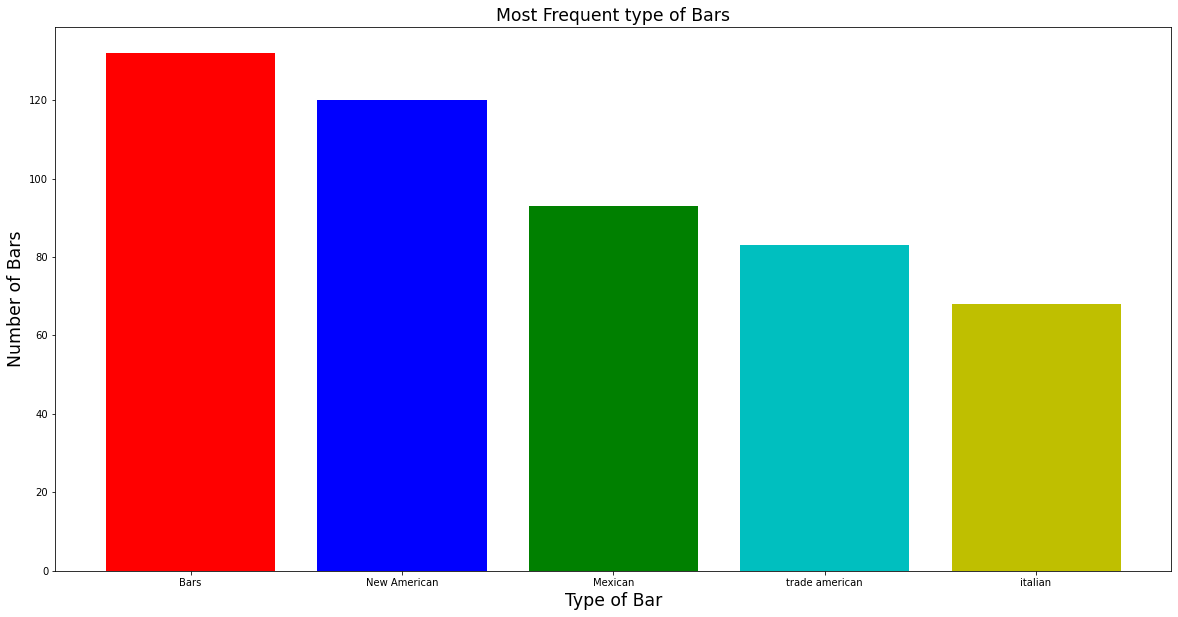

<Figure size 432x288 with 0 Axes>

In [89]:
Denver_data.groupby('categories')['zipcode'].count().nlargest()
fig, ax = plt.subplots(figsize=(20,10))
my_colors = list('rbgcy')

ax.bar(['Bars','New American','Mexican','trade american','italian',],Denver_data.groupby('categories')['zipcode'].count().nlargest(),color=my_colors)
ax.set_ylabel('Number of Bars', fontsize = 'xx-large')
ax.set_xlabel('Type of Bar',fontsize = 'xx-large')
ax.set_title('Most Frequent type of Bars',fontsize = 'xx-large')


plt.show()
plt.savefig('TopZipCodes.pdf')

Text(0.5, 1.0, 'Relation of Reviews and average of Rating by Zipcode')

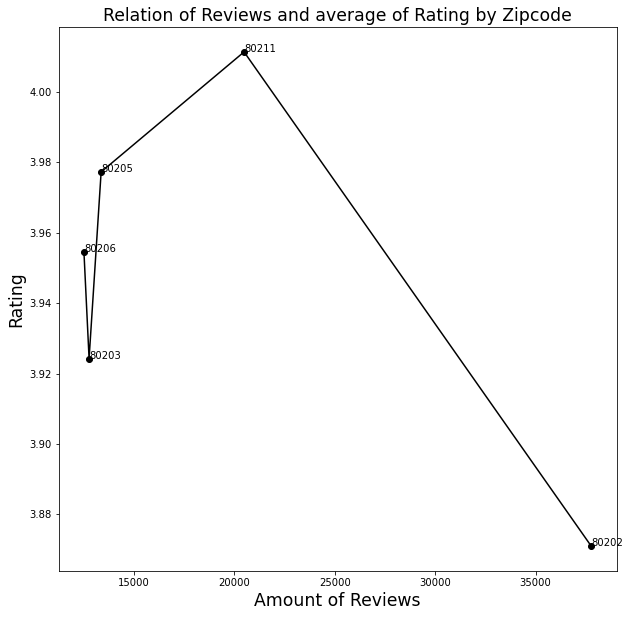

In [90]:
indexNames = Denver_data[(Denver_data['zipcode'] !=  80202) & (Denver_data['zipcode'] !=  80203) & (Denver_data['zipcode'] !=  80205) & (Denver_data['zipcode'] !=  80206) &(Denver_data['zipcode'] !=  80211)].index
Denver_data.drop(indexNames, inplace=True)
Denver = Denver_data
Denver['zipcode'].mean()

DZipRating=Denver.groupby('zipcode')['rating'].mean()
DZipRC=Denver.groupby('zipcode')['review count'].sum()

fig, ax = plt.subplots(figsize=(10,10))
y=[3.870967741935484,
 3.9242424242424243,
 3.977272727272727,
 3.9545454545454546,
 4.011363636363637]
x= [37774, 12758, 13359, 12502, 20480]
x,y = zip(*sorted(zip(x,y)))

ax.annotate('80206',(x[0],y[0]),ha = 'left')
ax.annotate('80203',(x[1],y[1]),ha = 'left')
ax.annotate('80205',(x[2],y[2]),ha = 'left')
ax.annotate('80211',(x[3],y[3]),ha = 'left')
ax.annotate('80202',(x[4],y[4]),ha = 'left')
ax.plot(x,y,marker='o',color='black')
ax.set_xlabel('Amount of Reviews',fontsize = 'xx-large')
ax.set_ylabel('Rating',fontsize = 'xx-large')
ax.set_title('Relation of Reviews and average of Rating by Zipcode',fontsize = 'xx-large')

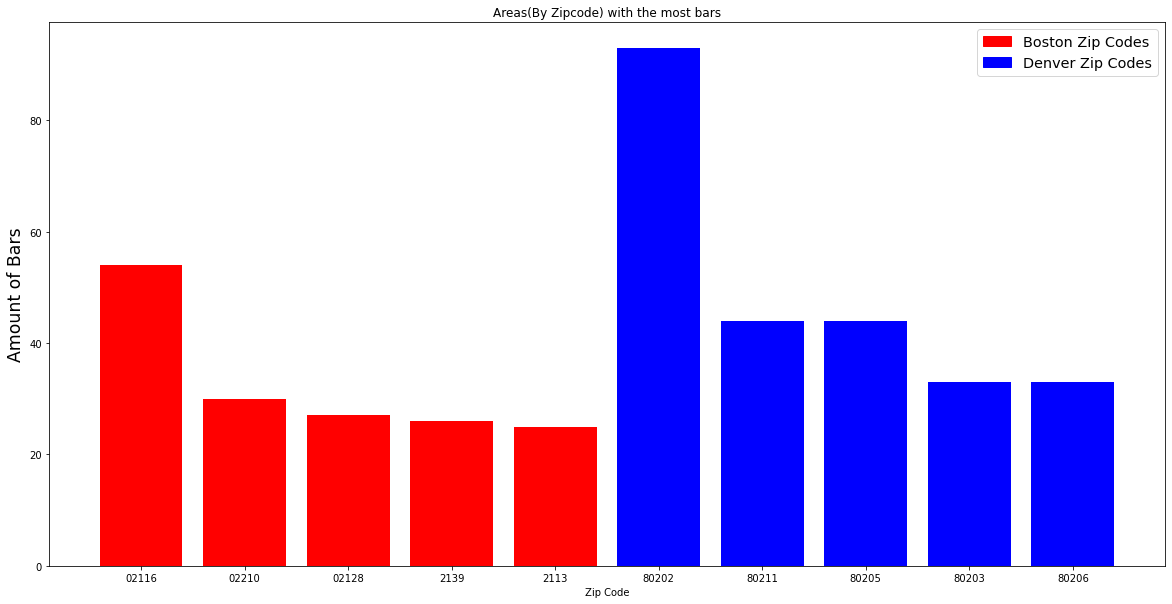

<Figure size 432x288 with 0 Axes>

In [4]:
list1 = Boston_data['zipcode'].value_counts().head().tolist()
list2 = Denver_data['zipcode'].value_counts().head().tolist()
Amounts = list1 + list2

fig, ax = plt.subplots(figsize=(20,10))
my_colors = list('rrrrrbbbbb')

ax.bar(['02116','02210','02128','2139','2113','80202','80211','80205','80203','80206'],Amounts,color=my_colors)
ax.set_ylabel('Amount of Bars', fontsize = 'xx-large')
ax.set_xlabel('Zip Code')
ax.set_title('Areas(By Zipcode) with the most bars')

red_patch = mpatches.Patch(color='red', label='Boston Zip Codes')
blue_patch = mpatches.Patch(color='blue', label = 'Denver Zip Codes')
plt.legend(handles=[red_patch,blue_patch],fontsize = 'x-large')

plt.show()
plt.savefig('TopZipCodes.pdf')

In [5]:
Bostonrt = Boston_data.groupby(['delivery'])['rating'].mean().loc[True]
Bostonft = Boston_data.groupby(['delivery'])['rating'].mean().loc[False]
BTF = [Bostonrt,Bostonft]

In [6]:
Denverft = Denver_data.groupby(['delivery'])['rating'].mean().loc[False]
Denverrt = Denver_data.groupby(['delivery'])['rating'].mean().loc[True]
DTF = [Denverrt,Denverft]

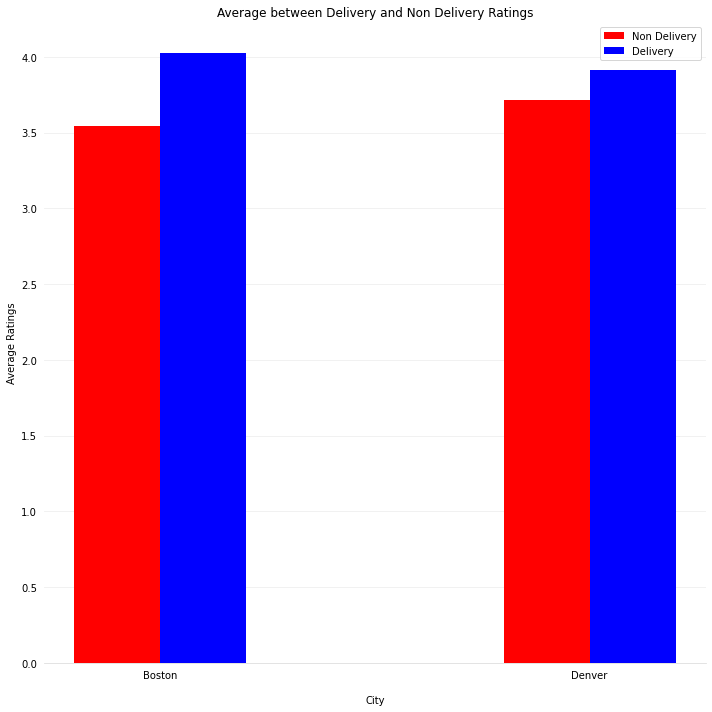

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

labels = ['Boston','Denver']
z = np.arange(len(DTF))
bar_width = .2

rects1 = ax.bar(z,Boston_data.groupby(['delivery'])['rating'].mean() , width=bar_width, label = "Non Delivery",color='r')
rects2 = ax.bar(z + bar_width ,Denver_data.groupby(['delivery'])['rating'].mean(), width=bar_width, label = 'Delivery', color='b')

ax.set_ylabel('Average Ratings')
ax.set_title('Average between Delivery and Non Delivery Ratings')
ax.set_xticks(z + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel('City', labelpad=15)

fig.tight_layout()
plt.show()
plt.savefig('AveragePerCity.jpg')